In [ ]:
#1: Stardard Deviation measures how spread out the data values are from their mean. A larger standard deviation indicates that the data points are more spread out from their mean, while a smaller standard deviation means that they are more centered together close to the mean.
# SD applies to the entire dataset and shows the uncertainty of all the datapoints. 
# Standard Error of the Mean estimates the variaility of the sample mean, based on one sample's SD and its size. It is a formula to expect how much the sample mean varies if multiple samples from the population is taken. 
# SEM can be used to quantify the uncertainty around the sample mean, such as confidence interval construction, hypothesis testing, and comparing means between groups. For example, confidence interval construction finds where the true population parameter is likely to be at. 

In [ ]:
#2: To create a 95% confidence interval using SEM, first calculate the mean of the data points. Secondly, find the SD of the data and divide it by the square root of the sample size (this step is also standard error of the mean). 
# 95% confidence level means that it leaves 2.5% in each tail. The z-value that corresponds to cumulative probability of 0.975 is 1.96. Now multiply the standard error by 1.96, and lastly, add and subtract that value from the sample mean to get the confidence interval. 

In [ ]:
#3. To create a 95% bootstrapped confidence interval without using the standard error, first I need to generate a lot of random bootstrapped samples from the original data. 
#Then, calculate and sort the mean of each of the sample generated in ascending order. The range of the 2.5th percentile and the 97.5th percentile is the condifence interval. 

In [ ]:
#4. 
import numpy as np

# a set of sample data
sample = np.array([12, 15, 14, 10, 18, 20, 13, 17, 19, 11])

# these are the parameters for bootstrapping
n_bootstrap = 10000
# number of bootstrap samples generated
confidence_level = 95
# confidence level

# function created
def bootstrap_mean_ci(sample, n_bootstrap=10000, confidence_level=95):
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        #calculating the mean of the bootstrap samples
        bootstrap_means[i] = np.mean(bootstrap_sample)
    
    # calculating confidence intervals
    lower_percentile = (100 - confidence_level) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(bootstrap_means, lower_percentile)
    upper_bound = np.percentile(bootstrap_means, upper_percentile)
    
    return lower_bound, upper_bound

# result: the 95% bootstrap confidence interval
ci_lower, ci_upper = bootstrap_mean_ci(sample, n_bootstrap, confidence_level)

print(f"95% Bootstrap Confidence Interval for the Mean: ({ci_lower:.2f}, {ci_upper:.2f})")

In [ ]:
#5. Population parameter is a characteristic of the entrie population, and the sample statistic is a calculated value from a sample to estimate the population parameter. 
# There are a few reasons to distinguish between the population parameter and the sample statistics. First, the sample statistic is only an estimation of the population parameter, and they can vary due to the sampling variability. 
# This distinction and difference allows people to make inferences and see its reliability about the population based on the samples statistics. 

In [ ]:
#6. 1)For example you have 10 data points that you collected about the lifespans of pet hamsters. Now you are going to pretend that you have way more data than the ones you collected. 
# You are going to randomly pick data points from your data sample, and collect 10 sample points (because your sample has 10 data points) for each of the new "bootstrapped" samples. You can pick the same point more than once. 
# And repeat for a lot of times, like more than 1000 times. You now end up with 1000 bootstrapped samples that you can calculate the statistics that you wish to know! 
#6. 2)The main purpose for bootstrapping is to help us understand the variability of a statistic without needing to collect, like 1000 data, which is time and cost consuming. 
#Boostrapping can also help us figure out what is the change if there are different samples from the same population. 
#6. 3) Let's say that you make a hypothesized guess that the average of a pet hamster is 20 months. You can collect data of your friends' hamsters' lifespan and use boostrapping to find out your average lifespan. 
# Do the process in 6.1 and you find the average lifespan of each bootstrapped samples. 
#You now end up with 1000 averages of a hamster's lifespan, and the distribution graph can tell you if your guess of 20 months is reasonable or not depending on how close the boostrapping samples are to 20 months.   

In [ ]:
#7. A confidence interval overlapping zero means that it cannot be said that the drug has an effect, the true average effect could be positive, negative, or zero. 
# On the other hand, if the confidence interval does not overlap zero, it indicates that all the plausible values are either above or below. This shows that there is a significant effect of the drug. 
# In this case, a conclusion that the drug likely has an impact is made, therefore, the null hypothesis are rejected. 

In [ ]:
#8. Problem Introduction: 
        # Null Hypothesis: means that there is no effect of the vaccine on patients' health scores. The guess is making an assumption that the average health scores is the same and before and after receiving vaccination. 

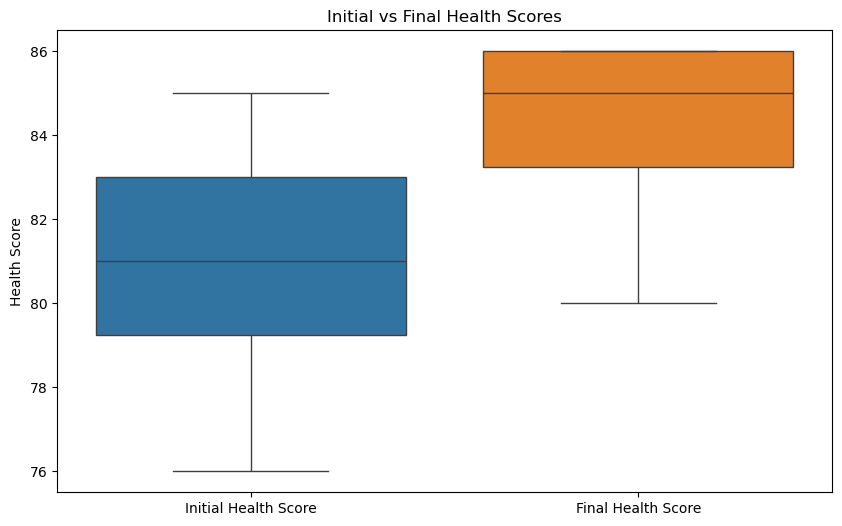

In [1]:
#8. Data Visualization: create box plots for initial and final health scores of the patients.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)
df.to_csv("vaccine_data.csv", index=False)

df = pd.read_csv("vaccine_data.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']])
plt.title('Initial vs Final Health Scores')
plt.ylabel('Health Score')
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.show()

Bootstrapped 95% confidence interval for the difference in means: (1.30, 5.40)


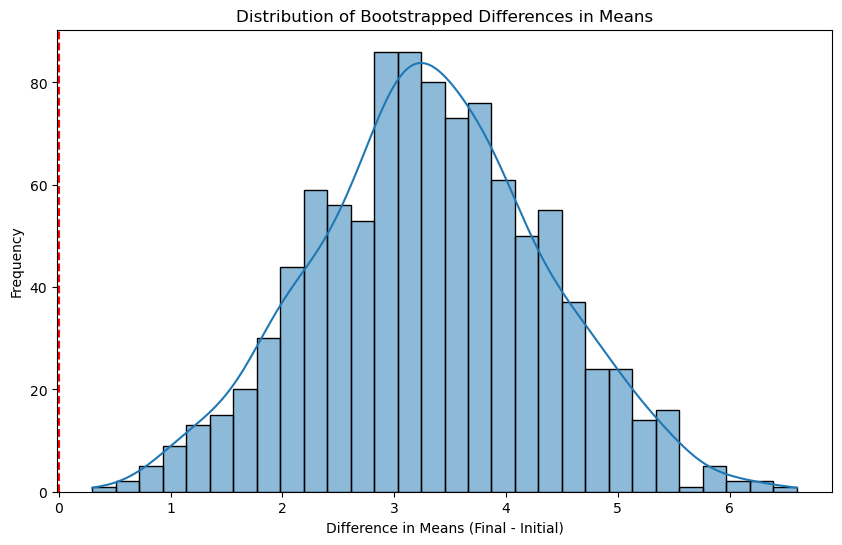

In [3]:
#8. Quantitative Analysis: 
    #A bootstrapping analysis is used to solve this problem: 
import numpy as np

# a random seed
np.random.seed(42)

# create 1000 bootstrap samples
num_bootstrap_samples = 1000
bootstrap_differences = []

for _ in range(num_bootstrap_samples):
    sample_initial = np.random.choice(df['InitialHealthScore'], size=len(df), replace=True)
    sample_final = np.random.choice(df['FinalHealthScore'], size=len(df), replace=True)
    
    # calculate the difference in means
    difference = np.mean(sample_final) - np.mean(sample_initial)
    bootstrap_differences.append(difference)

# calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_differences, 2.5)
upper_bound = np.percentile(bootstrap_differences, 97.5)

print(f"Bootstrapped 95% confidence interval for the difference in means: ({lower_bound:.2f}, {upper_bound:.2f})")

#Supporting Visualizations: 
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_differences, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Bootstrapped Differences in Means')
plt.xlabel('Difference in Means (Final - Initial)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#8. Findings and Discussion: The output gives a confidence interval (1.30, 5.4), whcih means this interval does not overlap zero, which indicates that the vaccine likely has a significant positive effect. 
    #Further Considerations: This study can be tested with a larger data sample. This statistics can be further studied with other factors, such as age and gender, to find the effectiveness on people with different traits. 

In [ ]:
# 9. Yes. 

In [ ]:
#Here is the link to chat history that I had with ChatGPT: https://chatgpt.com/c/66ff3970-3308-8011-b762-6a148cd47e74